In [9]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [10]:
!head data-t40-n1000-grid.out

buffersize;t_average;send messages
8;3.68643e-06;1000
16;4.1635e-06;1000
24;2.64752e-06;1000
40;4.71246e-06;1000
64;3.13354e-06;1000
104;4.00949e-06;1000
168;3.96705e-06;1000
272;4.26745e-06;1000
440;4.34601e-06;1000


In [11]:
!mv data-t40-n1000-grid.out data-t40-n1000-grid.csv

In [25]:
df = pd.read_csv('data-t40-n100000-grid.csv', sep=';')

In [26]:
df[:7].buffersize

0      8
1     16
2     24
3     40
4     64
5    104
6    168
Name: buffersize, dtype: int64

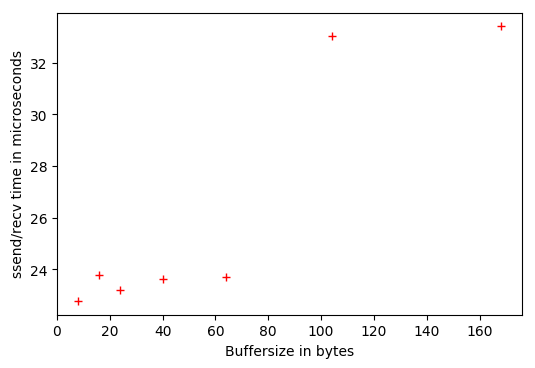

In [32]:
data_head = df[:7]
plt.figure(dpi=100)
plt.xlabel('Buffersize in bytes')
plt.ylabel('ssend/recv time in microseconds')
plt.plot(data_head.buffersize, [x * 10e6 for x in data_head.t_average], 'r+');

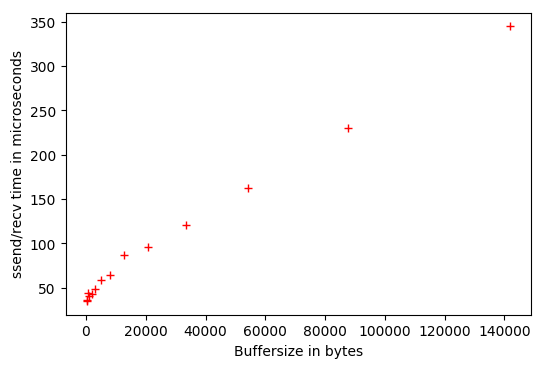

In [31]:
data_head = df[7:]
plt.figure(dpi=100)
plt.xlabel('Buffersize in bytes')
plt.ylabel('ssend/recv time in microseconds')
plt.plot(data_head.buffersize, [x * 10e6 for x in data_head.t_average], 'r+');

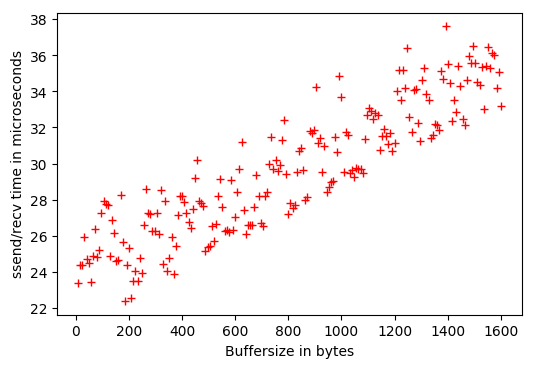

In [33]:
df = pd.read_csv('data-lin-t200-n100000.csv', sep=';')
plt.figure(dpi=100)
plt.xlabel('Buffersize in bytes')
plt.ylabel('ssend/recv time in microseconds')
plt.plot(df.buffersize, [x * 10e6 for x in df.t_average], 'r+');